In [2]:
import pandas as pd
import matplotlib
import re


metrics = {
    "total_reward":[],
    "total_len":[],
    "critic_loss":[],
    "actor_loss":[],
}
with open('metrics_optimize.txt','r')as f:
    lines = f.readlines()
    for line in lines:
        if 'total_reward' not in line:
            continue
        total_reward = float(re.search(r'total_reward: [^,\s]+',line)[0].split(':')[-1])
        total_len = float(re.search(r'total_len: [^,\s]+',line)[0].split(':')[-1])
        critic_loss = float(re.search(r'critic_loss: [^,\s]+',line)[0].split(':')[-1])
        actor_loss = float(re.search(r'actor_loss: [^,\s]+',line)[0].split(':')[-1])
        metrics['total_reward'].append(total_reward)
        metrics['total_len'].append(total_len)
        metrics['critic_loss'].append(critic_loss)
        metrics['actor_loss'].append(actor_loss)

In [3]:
total_reward = pd.Series(metrics['total_reward'])
total_len = pd.Series(metrics['total_len'])
critic_loss = pd.Series(metrics['critic_loss'])
actor_loss = pd.Series(metrics['actor_loss'])

<AxesSubplot:>

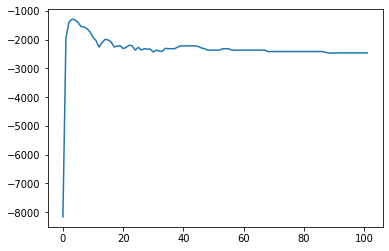

In [4]:
total_reward.plot()

<AxesSubplot:>

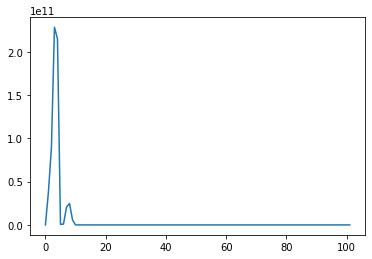

In [5]:
critic_loss.plot()

<AxesSubplot:>

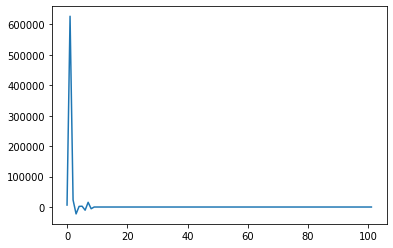

In [6]:
actor_loss.plot()

<AxesSubplot:>

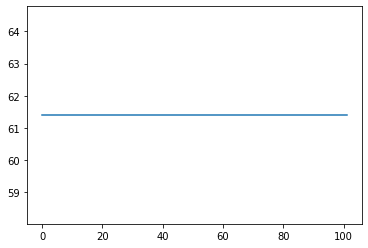

In [7]:
total_len.plot()

In [17]:
import pandas as pd

init_data = pd.read_csv('/data/clusterdata/cluster-trace-v2017/init_data_small.csv')
usage_data = pd.read_csv('/data/clusterdata/cluster-trace-v2017/usage_data_small.csv')

In [18]:
init_data

,Unnamed: 0,start_time,pod_id,node_id,used_cpu,used_mem
0,0,39600,0,0,1.8720,0.054504
1,1,39600,1,1,0.2784,0.024767
2,2,39600,2,2,0.0880,0.015963
3,3,39600,3,3,0.3280,0.022324
4,4,39600,4,4,0.4608,0.017227
...,...,...,...,...,...,...
95,95,39600,95,91,2.1320,0.030162
96,96,39600,96,92,0.3584,0.024089
97,97,39600,97,93,1.4272,0.041595
98,98,39600,98,94,0.4752,0.110061


In [19]:
usage_data

,Unnamed: 0,start_time,pod_id,used_cpu,used_mem
0,88,39600,66,0.3600,0.020187
1,152,39600,65,0.4320,0.017345
2,1143,39600,32,0.3392,0.035539
3,1162,39600,31,1.1460,0.037702
4,1189,39600,33,0.4984,0.022630
...,...,...,...,...,...
14303,1382815,82500,13,0.2288,0.024258
14304,1382879,82500,49,0.3808,0.039271
14305,1382994,82500,50,0.4320,0.023936
14306,1383233,82500,10,0.7232,0.025539


In [20]:
usage_data = usage_data[['start_time','pod_id','used_cpu','used_mem']]

In [22]:
len(usage_data.groupby('pod_id'))

100

In [40]:
cpu_var = []
mem_var = []
for index,usage_data_pod in usage_data.groupby('pod_id'):
    cpu_var.append(usage_data_pod['used_cpu'].std())
    mem_var.append(usage_data_pod['used_mem'].std())

<AxesSubplot:>

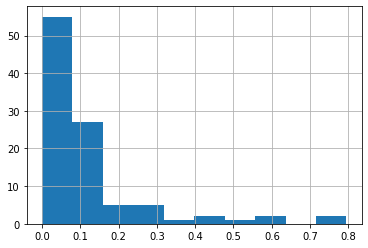

In [41]:
pd.Series(cpu_var).hist()

<AxesSubplot:>

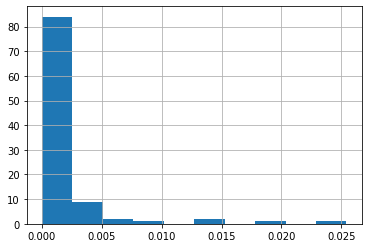

In [43]:
pd.Series(mem_var).hist()